In [77]:
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

billboard = pd.read_csv('billboard.csv')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.

(Note: you'll want to use both performer and song in any group_by operations, to account for the fact that multiple unique songs can share the same title.)

In [78]:
data = billboard[['song','performer','weeks_on_chart']]
grouped_data = data.groupby(['song', 'performer'])[['weeks_on_chart']].sum()
sorted_data = grouped_data.sort_values(by='weeks_on_chart', ascending=False).head(10)
sorted_data.rename(columns={'weeks_on_chart': 'count'},inplace=True)
sorted_data


,,count
song,performer,
Radioactive,Imagine Dragons,3828
Sail,AWOLNATION,3160
Blinding Lights,The Weeknd,2926
I'm Yours,Jason Mraz,2926
How Do I Live,LeAnn Rimes,2415
Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,2346
Counting Stars,OneRepublic,2346
Rolling In The Deep,Adele,2145
Foolish Games/You Were Meant For Me,Jewel,2145


Is the "musical diversity" of the Billboard Top 100 changing over time? Let's find out. We'll measure the musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.

There are number of ways to accomplish the data wrangling here. For example, you could use two distinct sets of data-wrangling steps. The first set of steps would get you a table that counts the number of times that a given song appears on the Top 100 in a given year. The second set of steps operate on the result of the first set of steps; it would count the number of unique songs that appeared on the Top 100 in each year, irrespective of how many times it had appeared.

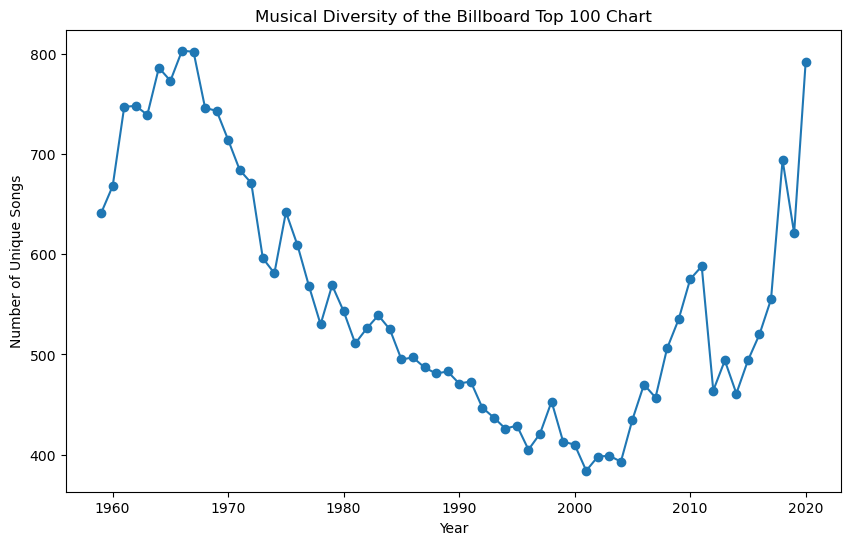

In [79]:
filtered_data = billboard[(billboard['year'] != 1958) & (billboard['year'] != 2021)]

# Group by year and count the number of unique songs
musical_diversity = filtered_data.groupby('year')['song'].nunique()

# Plotting
plt.figure(figsize=(10, 6))
musical_diversity.plot(kind='line', marker='o')
plt.title("Musical Diversity of the Billboard Top 100 Chart")
plt.xlabel("Year")
plt.ylabel("Number of Unique Songs")
plt.show()

 Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.

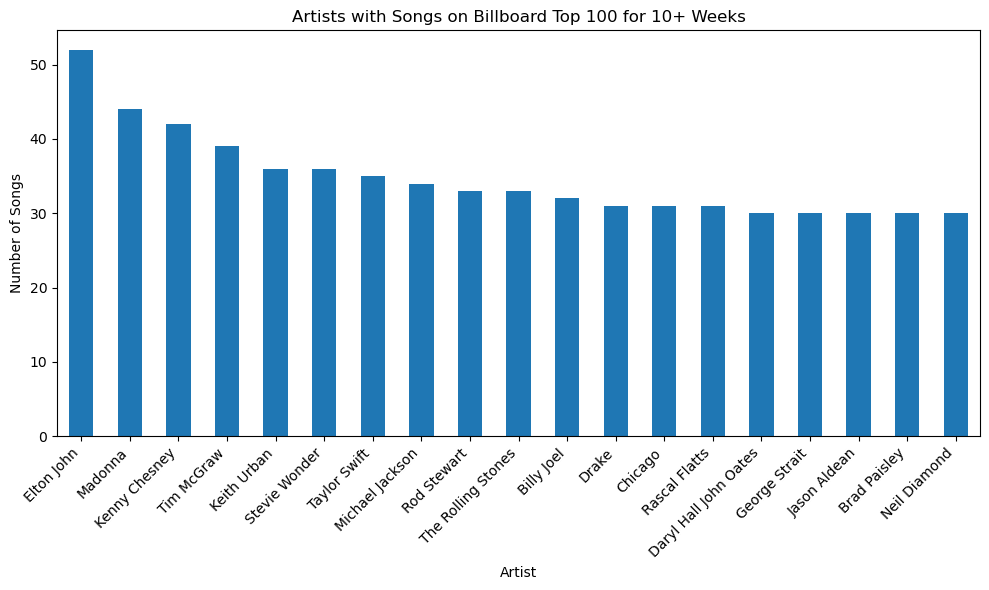

In [80]:
ten_week_hits = billboard[billboard['weeks_on_chart'] >= 10]
song_by_performer = ten_week_hits.groupby('performer')['song'].nunique()
performers_top = song_by_performer[song_by_performer >= 30]

plt.figure(figsize=(10, 6))
performers_top.sort_values(ascending=False).plot(kind='bar')
plt.title("Artists with Songs on Billboard Top 100 for 10+ Weeks")
plt.xlabel("Artist")
plt.ylabel("Number of Songs")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

